In [1]:
import numpy as np
import lmfit as lm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as ss

Parameters([('a', <Parameter 'a', value=0.002482868829867655 +/- 6.06e-05, bounds=[-inf:inf]>)])


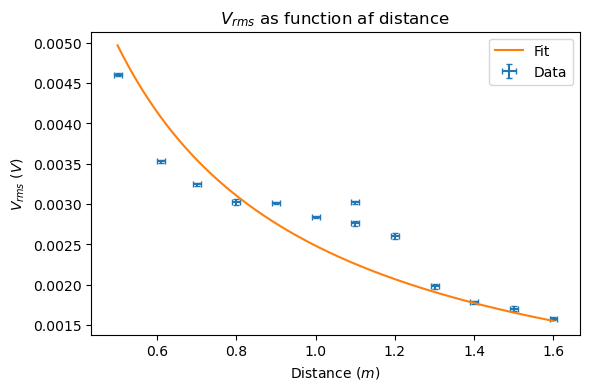

In [2]:
cm = 1/2.54

fig, ax = plt.subplots(figsize = (16*cm, 10*cm))

# Andet data - Afstandens betydning
xs = np.array([0.5, 0.61, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.1])
ys = np.array([4.601, 3.531, 3.243, 3.023, 3.016, 2.840, 3.022, 2.605, 1.981, 1.782, 1.702, 1.578, 2.761])*10**-3
error = np.array([17.03, 16.79, 17.84, 40.69, 13.31, 16.45, 21.77, 37.53, 27.93, 17.43, 30.79, 18.22, 28.02])*10**-6
xerr = np.ones(xs.size)*0.01

def theory(varibles, x):
    a = varibles['a']
    return a/x

def fit(varibles, x, y, error):
    y_theory = theory(varibles, x)
    return (y_theory - y)**2/error

Varibles = lm.Parameters()
Varibles.add('a', value = 1)

y_fit = lm.minimize(fit, Varibles, args = (xs, ys, error))
print(y_fit.params)
ax.errorbar(xs, ys, yerr = error, xerr = xerr, linestyle = '', marker = '', label = 'Data', capsize = 2)

xs_plot = np.linspace(2, 8, 500)
xs_plot = np.linspace(xs.min(), xs.max(), 500)
ax.plot(xs_plot, theory(y_fit.params, xs_plot), label = 'Fit')
ax.set_title('$V_{rms}$ as function af distance')
ax.set_xlabel('Distance ($m$)')
ax.set_ylabel('$V_{rms}$ ($V$)')
ax.legend()
plt.savefig('Kalibrering 2.png')
plt.show()

In [3]:
y_fit

Parameters([('a', <Parameter 'a', value=0.002138931418360667 +/- 1.17e-05, bounds=[-inf:inf]>)])


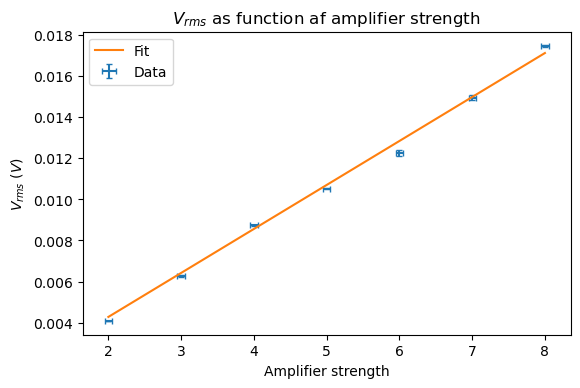

In [4]:
fig, ax = plt.subplots(figsize = (16*cm, 10*cm))
# 1.793, 23.72
# Første data - Forstærkerens betydning
xs = np.arange(2, 9, 1)
ys = np.array([4.091, 6.278, 8.737, 10.50, 12.26, 14.94, 17.45])*10**-3
error = np.array([8.978, 34.78, 28.40, 24.46, 140.8, 112.7, 34.70])*10**-6
xs_error = np.ones(xs.size)*0.05


def theory(varibles, x):
    a = varibles['a']
    return a*x

def fit(varibles, x, y, error):
    y_theory = theory(varibles, x)
    return (y_theory - y)**2/error

Varibles = lm.Parameters()
Varibles.add('a', value = 1)

y_fit = lm.minimize(fit, Varibles, args = (xs, ys, error))
print(y_fit.params)
ax.errorbar(xs, ys, xerr = xs_error, yerr = error, linestyle = '', marker = '', label = 'Data', capsize = 2)

xs_plot = np.linspace(xs.min(), xs.max(), 500)
ax.plot(xs_plot, theory(y_fit.params, xs_plot), label = 'Fit')
ax.set_title('$V_{rms}$ as function af amplifier strength')
ax.set_xlabel('Amplifier strength')
ax.set_ylabel('$V_{rms}$ ($V$)')
ax.legend()
plt.savefig('Kalibrering 1.png')
plt.show()

$I_{rms}$ = 2.3, $\sigma = $ 31.89

# Eksperiment 2

Parameters([('amp', <Parameter 'amp', value=0.0012105763232257427 +/- 3.23e-05, bounds=[0:inf]>), ('w', <Parameter 'w', value=1.2791953394087288 +/- 0.0272, bounds=[0:inf]>), ('phi', <Parameter 'phi', value=6.151109039984071 +/- 0.0656, bounds=[0:6.283185307179586]>), ('offset', <Parameter 'offset', value=0.0026904435778244977 +/- 3.32e-05, bounds=[-inf:inf]>)])


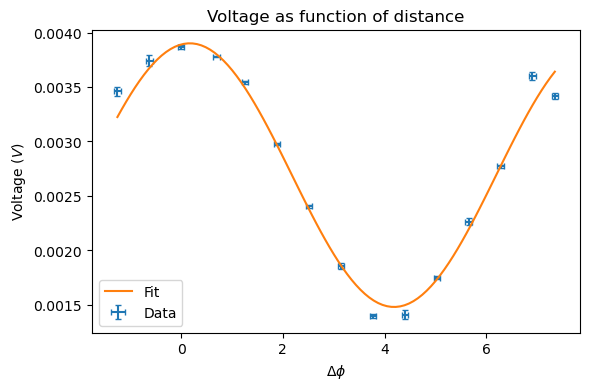

In [5]:
def theory(varibles, x):
    A = varibles['amp']
    w = varibles['w']
    phi = varibles['phi']
    offset = varibles['offset']
    y = A*np.cos(x/w + phi) + offset
    return y

def fit(varibles, x, y, uncertainties):
    y_theoretical = theory(varibles, x)
    return (y_theoretical - y)/uncertainties

Varibles = lm.Parameters()
Varibles.add('amp', value = 1, min = 0)
Varibles.add('w', value = 1, min = 0)
Varibles.add('phi', value = 0, min = 0, max = 2*np.pi)
Varibles.add('offset', value = 0)


xs = np.array([-0.2, -0.1, 0, 0.11, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.17])
Vs = np.array([3.460, 3.739, 3.867, 3.779, 3.544, 2.980, 2.405, 1.858, 1.395, 1.409, 1.750, 2.264, 2.772, 3.599, 3.417])*10**-3
error = np.array([40.26, 50.44, 17.37, 7.582, 12.99, 9.943, 13.71, 29.75, 20.63, 39.04, 13.66, 28.86, 13.50, 34.66, 26.48])*10**-6
phis = 2*np.pi*xs
error_x = 2*np.pi*0.01

y_fit = lm.minimize(fit, Varibles, args = (phis, Vs, error))

phis_plot = np.linspace(phis.min(), phis.max(), 100)

print(y_fit.params)

fig, ax = plt.subplots(figsize = (16*cm, 10*cm))
ax.errorbar(phis, Vs, linestyle = '', yerr = error, xerr = error_x, capsize = 2, label = 'Data')
ax.plot(phis_plot, theory(y_fit.params, phis_plot), label = 'Fit')
ax.legend()
ax.set_xlabel('$\Delta \phi$')
ax.set_ylabel('Voltage ($V$)')
ax.set_title('Voltage as function of distance')
plt.savefig('Eksperiment 1.png')
plt.show()

In [6]:
y_fit